In [1]:
import cv2
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
import seaborn as sns


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-29 17:32:59.132617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_path = '/Users/alexander/JupyterNotebooks/brain/Training'
test_path = '/Users/alexander/JupyterNotebooks/brain/Testing'


In [3]:

sub_dirs = os.listdir(train_path)  
sub_dirs.remove('.DS_Store')
sub_dirs

['pituitary', 'notumor', 'glioma', 'meningioma']

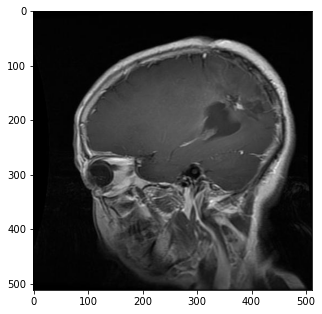

In [4]:
plt.figure(figsize = (5,10))
example_1 = '/Users/alexander/JupyterNotebooks/brain/Training/glioma/Tr-gl_0022.jpg'
image = imread(example_1)
plt.imshow(image)
plt.show()

In [5]:
image.shape

(512, 512, 3)

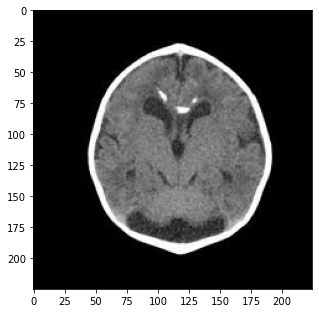

In [6]:
plt.figure(figsize = (5,10))
example_2 = '/Users/alexander/JupyterNotebooks/brain/Training/notumor/Tr-no_0010.jpg'
image = imread(example_2)
plt.imshow(image)
plt.show()

In [7]:
image.shape

(225, 225, 3)

In [11]:
rescaled = cv2.resize(cv2.imread(example_2),(150,150))

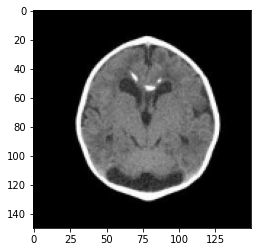

In [12]:
plt.imshow(rescaled)
plt.show()

In [13]:
rescaled.shape

(150, 150, 3)

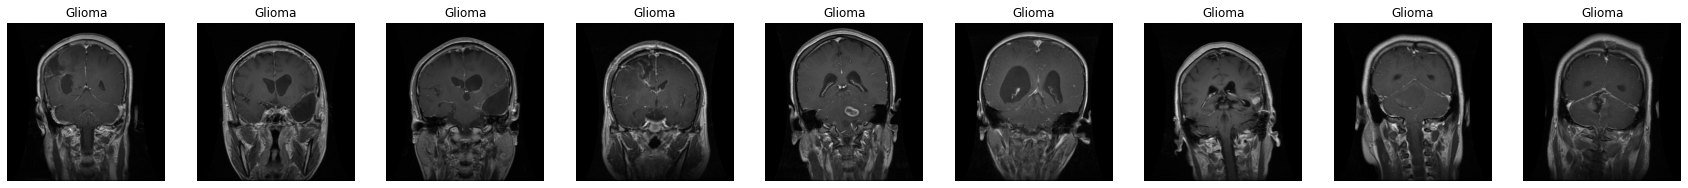

In [14]:
plt.figure(figsize=(30,30)) 
plt.subplots_adjust(hspace=0.4)

for i in range(9):
    
    plt.subplot(1,9, i+1)
    filename = '/Users/alexander/JupyterNotebooks/brain/Training/glioma/Tr-gl_001' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Glioma',fontsize=12)
    plt.axis('off')

plt.show()

In [8]:
def y_2binary(n):
    z=np.zeros((4), dtype=int)
    z[n]=1
    return z


In [9]:
output_dictionary = {}   
for i in range(len(sub_dirs)):
    output_dictionary.update({sub_dirs[i]: i})

print('The subdirectories are',sub_dirs,'.\n')

The subdirectories are ['pituitary', 'notumor', 'glioma', 'meningioma'] .



In [10]:
x_train_CNN = []  
x_test_CNN = []  

y_train = []
y_test = []


for dir in sub_dirs:
    sub_dir_path_train = train_path + '/' + dir
    file_counter_train=0
    for path in os.listdir(sub_dir_path_train):
        x=os.path.join(sub_dir_path_train,path)
        if os.path.isfile(x):
            file_counter_train+=1
            
            image_CNN = cv2.resize(cv2.imread(x,cv2.IMREAD_GRAYSCALE),(150,150))
            
            x_train_CNN.append(image_CNN)
            y_train.append(y_2binary(output_dictionary[dir]))
            
    print('The training directory',dir,'has',file_counter_train,'samples.')
print()

The training directory pituitary has 1457 samples.
The training directory notumor has 1595 samples.
The training directory glioma has 1321 samples.
The training directory meningioma has 1339 samples.



In [11]:
for dir in sub_dirs:
    sub_dir_path_test = test_path + '/' + dir
    file_counter_test=0
    for path in os.listdir(sub_dir_path_test):
        x=os.path.join(sub_dir_path_test,path)
        if os.path.isfile(x):
            file_counter_test+=1
            
            image_CNN = cv2.resize(cv2.imread(x,cv2.IMREAD_GRAYSCALE),(150,150))
            
            x_test_CNN.append(image_CNN)
            y_test.append(y_2binary(output_dictionary[dir]))
            
    print('The testing directory',dir,'has',file_counter_test,'samples.')
print()

The testing directory pituitary has 300 samples.
The testing directory notumor has 405 samples.
The testing directory glioma has 300 samples.
The testing directory meningioma has 306 samples.



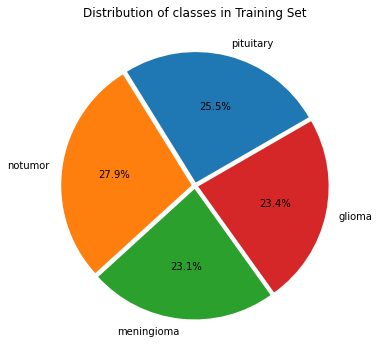

In [8]:
plt.figure(figsize=(14,6))
#colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
amounts = [1457,1595,1321,1339]
plt.pie(amounts,
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);
plt.title('Distribution of classes in Training Set')
plt.show()

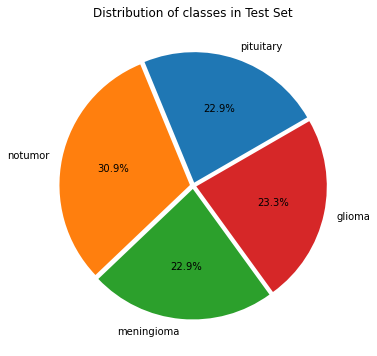

In [9]:
plt.figure(figsize=(14,6))
#colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
amounts = [300,405,300,306]
plt.pie(amounts,
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);
plt.title('Distribution of classes in Test Set')
plt.show()

In [12]:
x_train_CNN = np.array(x_train_CNN)/255.0
x_test_CNN = np.array(x_test_CNN)/255.0

## Duplicating grayscale images to make it seem like "RGB" for Pre-trained Models

In [11]:
x_train_copy = x_train_CNN 
x_train_copy.shape

(5712, 150, 150)

In [12]:
rgb_x_train = np.repeat(x_train_copy[..., np.newaxis], 3, -1)
print(rgb_x_train.shape)

(5712, 150, 150, 3)


In [13]:
x_test_copy = x_test_CNN 
x_test_copy.shape

(1311, 150, 150)

In [14]:
rgb_x_test = np.repeat(x_test_copy[..., np.newaxis], 3, -1)
print(rgb_x_test.shape) 

(1311, 150, 150, 3)


In [13]:
#x_train_CNN = np.array(x_train_CNN)/255.0
#x_test_CNN = np.array(x_test_CNN)/255.0
x_train_CNN  = x_train_CNN[:,:,:,np.newaxis]
x_test_CNN  =  x_test_CNN[:,:,:,np.newaxis] 

y_train = np.array(y_train)
y_test = np.array(y_test)

print('The shape of x_train_CNN is',x_train_CNN.shape,'.')
print('The shape of x_test_CNN is',x_test_CNN.shape,'.\n')
print('The shape of y_train is',y_train.shape,'.')
print('The shape of y_test is',y_test.shape,'.\n')


print('The total number of training samples is',len(y_train),'.')
print('The total number of testing samples is',len(y_test),'.\n')



The shape of x_train_CNN is (5712, 150, 150, 1) .
The shape of x_test_CNN is (1311, 150, 150, 1) .

The shape of y_train is (5712, 4) .
The shape of y_test is (1311, 4) .

The total number of training samples is 5712 .
The total number of testing samples is 1311 .



# VGG-16 Implementation 

In [63]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (150, 150, 3))

In [64]:
vgg.trainable = False

In [65]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    vgg,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:

es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(rgb_x_train, y_train, epochs=20, batch_size=64, callbacks=[es])
model.save('VGG16')

Epoch 1/20
90/90 [==============================] - 545s 6s/step - loss: 0.4902 - accuracy: 0.8146
Epoch 2/20
90/90 [==============================] - 530s 6s/step - loss: 0.2409 - accuracy: 0.9147
Epoch 3/20
90/90 [==============================] - 615s 7s/step - loss: 0.1795 - accuracy: 0.9371
Epoch 4/20
90/90 [==============================] - 584s 6s/step - loss: 0.1471 - accuracy: 0.9466
Epoch 5/20
90/90 [==============================] - 560s 6s/step - loss: 0.1146 - accuracy: 0.9589
Epoch 6/20
90/90 [==============================] - 6230s 70s/step - loss: 0.0966 - accuracy: 0.9676
Epoch 7/20
90/90 [==============================] - 7706s 86s/step - loss: 0.0621 - accuracy: 0.9821
Epoch 8/20
90/90 [==============================] - 9761s 110s/step - loss: 0.0635 - accuracy: 0.9799
Epoch 9/20
90/90 [==============================] - 9175s 103s/step - loss: 0.0441 - accuracy: 0.9877
Epoch 10/20
 1/90 [..............................] - ETA: 11:12 - loss: 0.0156 - accuracy: 1.0000

# Loading Saved Model

In [4]:
VGG16_saved_model = tf.keras.models.load_model("VGG16")

In [5]:
VGG16_saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 50)                409650    
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 4)                 84        
                                                                 
Total params: 15125442 (57.70 MB)
Trainable params: 410754 (1.57 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [6]:
len(VGG16_saved_model.layers)

5

41/41 [==============================] - 124s 3s/step


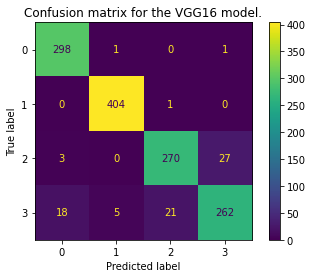

In [37]:
predictions_VGG16 = np.argmax(VGG16_saved_model.predict(rgb_x_test),axis=1)
test=np.argmax(y_test,axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_VGG16))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the VGG16 model.")
plt.show()

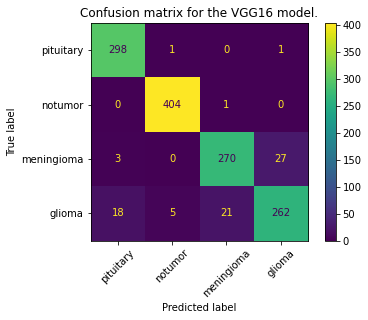

In [58]:

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_VGG16))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the VGG16 model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [10]:
classes = ['pituitary', 'notumor','meningioma','glioma']

In [59]:
classes = ['pituitary', 'notumor','meningioma','glioma']
print(classification_report(test, predictions_VGG16 , target_names= classes ))

              precision    recall  f1-score   support

   pituitary       0.93      0.99      0.96       300
     notumor       0.99      1.00      0.99       405
  meningioma       0.92      0.90      0.91       300
      glioma       0.90      0.86      0.88       306

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [36]:
val_loss_VGG16, val_accuracy=_VGG16 = VGG16_saved_model.evaluate(rgb_x_test, y_test)
test=np.argmax(y_test,axis=1)

 4/41 [=>............................] - ETA: 1:45 - loss: 0.0252 - accuracy: 0.9922

KeyboardInterrupt: 

In [34]:
val_loss_VGG16, val_accuracy=_VGG16 = model.evaluate(rgb_x_test, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 133s 3s/step - loss: 0.1027 - accuracy: 0.9718


41/41 [==============================] - 126s 3s/step


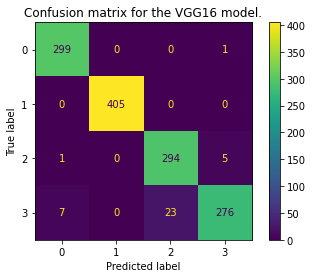

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions_VGG16 = np.argmax(model.predict(rgb_x_test),axis=1)

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_VGG16))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the VGG16 model.")
plt.show()

# InceptionV3 Implementation

In [57]:
from keras.applications.inception_v3 import InceptionV3
inceptionV3 = InceptionV3(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (150, 150, 3))

In [58]:
inceptionV3.trainable = False

In [59]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    inceptionV3,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_InceptionV3 = model.fit(rgb_x_train, y_train, epochs=20, batch_size=64, callbacks=[es])

model.save('InceptionV3_2')

Epoch 1/20
90/90 [==============================] - 108s 1s/step - loss: 1.4712 - accuracy: 0.6996
Epoch 2/20
90/90 [==============================] - 126s 1s/step - loss: 0.3656 - accuracy: 0.8638
Epoch 3/20
90/90 [==============================] - 104s 1s/step - loss: 0.2573 - accuracy: 0.9067
Epoch 4/20
90/90 [==============================] - 103s 1s/step - loss: 0.1894 - accuracy: 0.9308
Epoch 5/20
90/90 [==============================] - 104s 1s/step - loss: 0.1476 - accuracy: 0.9494
Epoch 6/20
90/90 [==============================] - 106s 1s/step - loss: 0.0961 - accuracy: 0.9671
Epoch 7/20
90/90 [==============================] - 106s 1s/step - loss: 0.0831 - accuracy: 0.9702
Epoch 8/20
90/90 [==============================] - 105s 1s/step - loss: 0.0740 - accuracy: 0.9732
Epoch 9/20
90/90 [==============================] - 106s 1s/step - loss: 0.0561 - accuracy: 0.9830
Epoch 10/20
90/90 [==============================] - 109s 1s/step - loss: 0.0270 - accuracy: 0.9932
Epoch 11/

INFO:tensorflow:Assets written to: InceptionV3_2/assets


In [61]:
val_loss_InceptionV3, val_accuracy_InceptionV3 = model.evaluate(rgb_x_test, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 37s 796ms/step - loss: 0.2715 - accuracy: 0.9138


In [4]:
Inception_saved_model = tf.keras.models.load_model("InceptionV3_2")

In [5]:
Inception_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 18432)             0         
                                                                 
 dense_19 (Dense)            (None, 50)                921650    
                                                                 
 dense_20 (Dense)            (None, 20)                1020      
                                                                 
 dense_21 (Dense)            (None, 4)                 84        
                                                                 
Total params: 22725538 (86.69 MB)
Trainable params: 922754 (3.52 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


41/41 [==============================] - 28s 634ms/step


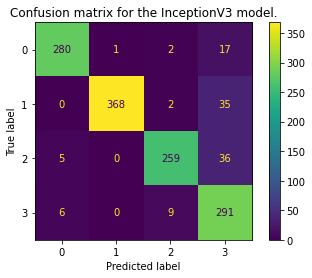

In [40]:
predictions_InceptionV3 = np.argmax(Inception_saved_model.predict(rgb_x_test),axis=1)

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_InceptionV3))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the InceptionV3 model.")
plt.show()

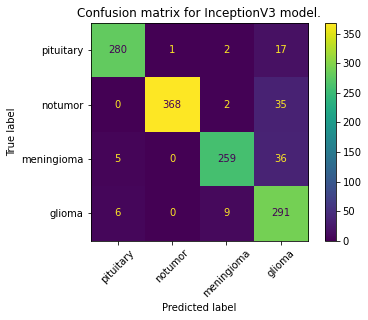

In [60]:
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_InceptionV3))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for InceptionV3 model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
classes = ['pituitary', 'notumor','meningioma','glioma']
print(classification_report(test, predictions_InceptionV3 , target_names= classes ))

              precision    recall  f1-score   support

   pituitary       0.96      0.93      0.95       300
     notumor       1.00      0.91      0.95       405
  meningioma       0.95      0.86      0.91       300
      glioma       0.77      0.95      0.85       306

    accuracy                           0.91      1311
   macro avg       0.92      0.91      0.91      1311
weighted avg       0.93      0.91      0.92      1311



41/41 [==============================] - 24s 559ms/step


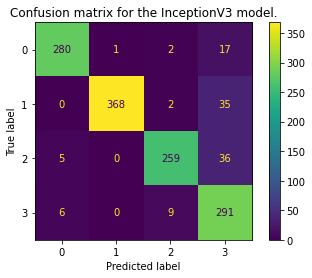

In [62]:
predictions_InceptionV3 = np.argmax(model.predict(rgb_x_test),axis=1)

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_InceptionV3))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the InceptionV3 model.")
plt.show()

# Xception

In [6]:
Xception_saved_model = tf.keras.models.load_model("Xception")

In [7]:
Xception_saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_13 (Dense)            (None, 50)                2560050   
                                                                 
 dense_14 (Dense)            (None, 20)                1020      
                                                                 
 dense_15 (Dense)            (None, 4)                 84        
                                                                 
Total params: 23422634 (89.35 MB)
Trainable params: 2561154 (9.77 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


41/41 [==============================] - 59s 1s/step


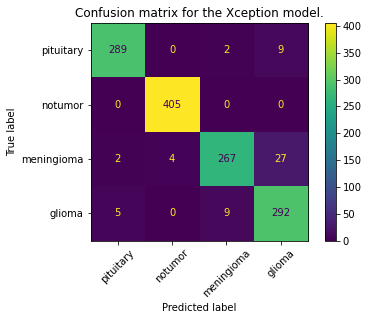

In [63]:
predictions_Xception = np.argmax(Xception_saved_model.predict(rgb_x_test),axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_Xception))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the Xception model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [64]:
print(classification_report(test, predictions_Xception , target_names= classes ))

              precision    recall  f1-score   support

   pituitary       0.98      0.96      0.97       300
     notumor       0.99      1.00      1.00       405
  meningioma       0.96      0.89      0.92       300
      glioma       0.89      0.95      0.92       306

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311



In [46]:
from keras.applications.xception import Xception
xception = Xception(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (150, 150, 3))

83683744/83683744 [==============================] - 8s 0us/step


In [47]:
xception.trainable = False

In [48]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    xception,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [49]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_Xception = model.fit(rgb_x_train, y_train, epochs=20, batch_size=64, callbacks=[es])

model.save('Xception')

Epoch 1/20
90/90 [==============================] - 314s 3s/step - loss: 0.6170 - accuracy: 0.8048
Epoch 2/20
90/90 [==============================] - 273s 3s/step - loss: 0.2179 - accuracy: 0.9214
Epoch 3/20
90/90 [==============================] - 281s 3s/step - loss: 0.1441 - accuracy: 0.9464
Epoch 4/20
90/90 [==============================] - 280s 3s/step - loss: 0.1254 - accuracy: 0.9555
Epoch 5/20
90/90 [==============================] - 264s 3s/step - loss: 0.0771 - accuracy: 0.9720
Epoch 6/20
90/90 [==============================] - 258s 3s/step - loss: 0.0740 - accuracy: 0.9723
Epoch 7/20
90/90 [==============================] - 235s 3s/step - loss: 0.0552 - accuracy: 0.9811
Epoch 8/20
90/90 [==============================] - 228s 3s/step - loss: 0.0372 - accuracy: 0.9879
Epoch 9/20
90/90 [==============================] - 238s 3s/step - loss: 0.0227 - accuracy: 0.9946
Epoch 10/20
90/90 [==============================] - 239s 3s/step - loss: 0.0140 - accuracy: 0.9981
Epoch 11/

INFO:tensorflow:Assets written to: Xception/assets


In [50]:
val_loss_Xception, val_accuracy_Xception = model.evaluate(rgb_x_test, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 52s 1s/step - loss: 0.1548 - accuracy: 0.9558


41/41 [==============================] - 55s 1s/step


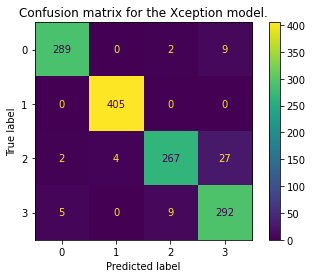

In [51]:
predictions_Xception = np.argmax(model.predict(rgb_x_test),axis=1)

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_Xception))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the Xception model.")
plt.show()

# Resnet 50 Implementation

In [8]:
Resnet50_saved_model = tf.keras.models.load_model("ResNet50")

In [9]:
Resnet50_saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 50)                2560050   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 4)                 84        
                                                                 
Total params: 26148866 (99.75 MB)
Trainable params: 2561154 (9.77 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


41/41 [==============================] - 56s 1s/step


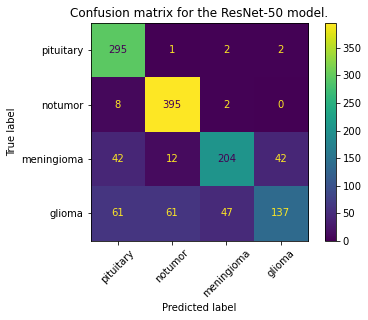

In [66]:
predictions_Resnet50 = np.argmax(Resnet50_saved_model.predict(rgb_x_test),axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_Resnet50))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the ResNet-50 model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [67]:
print(classification_report(test, predictions_Resnet50 , target_names= classes ))

              precision    recall  f1-score   support

   pituitary       0.73      0.98      0.84       300
     notumor       0.84      0.98      0.90       405
  meningioma       0.80      0.68      0.74       300
      glioma       0.76      0.45      0.56       306

    accuracy                           0.79      1311
   macro avg       0.78      0.77      0.76      1311
weighted avg       0.79      0.79      0.77      1311



In [22]:
from keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (150, 150, 3))

94765736/94765736 [==============================] - 3s 0us/step


In [24]:
resnet.trainable = False

In [25]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    resnet,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [26]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_ResNet50 = model.fit(rgb_x_train, y_train, epochs=20, batch_size=64, callbacks=[es])

model.save('ResNet50')

Epoch 1/20
90/90 [==============================] - 256s 3s/step - loss: 1.0701 - accuracy: 0.5415
Epoch 2/20
90/90 [==============================] - 240s 3s/step - loss: 0.7422 - accuracy: 0.7054
Epoch 3/20
90/90 [==============================] - 256s 3s/step - loss: 0.6380 - accuracy: 0.7542
Epoch 4/20
90/90 [==============================] - 597s 7s/step - loss: 0.5660 - accuracy: 0.7749
Epoch 5/20
90/90 [==============================] - 218s 2s/step - loss: 0.5023 - accuracy: 0.8102
Epoch 6/20
90/90 [==============================] - 211s 2s/step - loss: 0.5066 - accuracy: 0.8018
Epoch 7/20
90/90 [==============================] - 212s 2s/step - loss: 0.4648 - accuracy: 0.8139
Epoch 8/20
90/90 [==============================] - 213s 2s/step - loss: 0.4325 - accuracy: 0.8326
Epoch 9/20
90/90 [==============================] - 233s 3s/step - loss: 0.4170 - accuracy: 0.8325
Epoch 10/20
90/90 [==============================] - 210s 2s/step - loss: 0.3921 - accuracy: 0.8463
Epoch 11/

INFO:tensorflow:Assets written to: ResNet50/assets


In [27]:
val_loss_resnet, val_accuracy_resnet = model.evaluate(rgb_x_test, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 50s 1s/step - loss: 0.5538 - accuracy: 0.7864


41/41 [==============================] - 50s 1s/step


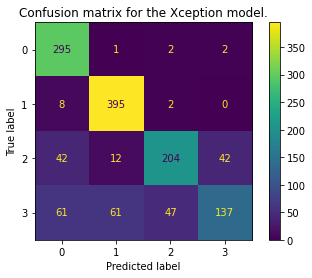

In [28]:
predictions_resnet = np.argmax(model.predict(rgb_x_test),axis=1)

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_resnet))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the Xception model.")
plt.show()

# Standard CNN models

In [25]:
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
model_CNN = Sequential()
model_CNN.add(InputLayer(input_shape=(150,150,1)))

model_CNN.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Conv2D(filters=256, kernel_size=(2,2), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten())
model_CNN.add(Dense(2048, activation='relu'))
model_CNN.add(Dropout(0.25))

model_CNN.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 146, 146, 32)      832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 73, 73, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 70, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 35, 35, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 35, 35, 64)       

In [26]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_CNN.fit(x_train_CNN, y_train, epochs=20, batch_size=64, callbacks=[es])
model_CNN.save('main_CNN')

Epoch 1/20
90/90 [==============================] - 216s 2s/step - loss: 1.0558 - accuracy: 0.5692
Epoch 2/20
90/90 [==============================] - 182s 2s/step - loss: 0.5814 - accuracy: 0.7775
Epoch 3/20
90/90 [==============================] - 177s 2s/step - loss: 0.4854 - accuracy: 0.8132
Epoch 4/20
90/90 [==============================] - 194s 2s/step - loss: 0.3845 - accuracy: 0.8563
Epoch 5/20
90/90 [==============================] - 204s 2s/step - loss: 0.3313 - accuracy: 0.8692
Epoch 6/20
90/90 [==============================] - 226s 3s/step - loss: 0.2666 - accuracy: 0.8922
Epoch 7/20
90/90 [==============================] - 240s 3s/step - loss: 0.2242 - accuracy: 0.9156
Epoch 8/20
90/90 [==============================] - 301s 3s/step - loss: 0.1939 - accuracy: 0.9277
Epoch 9/20
90/90 [==============================] - 329s 4s/step - loss: 0.1795 - accuracy: 0.9354
Epoch 10/20
90/90 [==============================] - 339s 4s/step - loss: 0.1498 - accuracy: 0.9450
Epoch 11/

INFO:tensorflow:Assets written to: main_CNN/assets


41/41 [==============================] - 10s 221ms/step


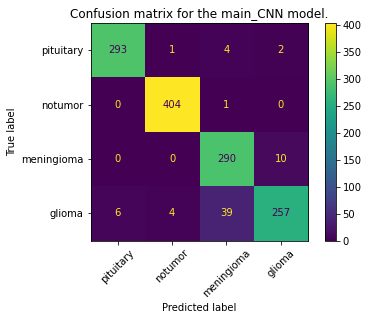

In [27]:
predictions_main_CNN = np.argmax(model_CNN.predict(x_test_CNN),axis=1)
test=np.argmax(y_test,axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_main_CNN))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the main_CNN model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [29]:
val_loss_CNN, val_accuracy_CNN = model_CNN.evaluate(x_test_CNN, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 9s 212ms/step - loss: 0.3242 - accuracy: 0.8589


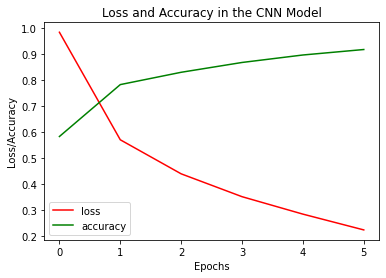

In [31]:
plt.plot(history_CNN.history["loss"],c="red")
plt.plot(history_CNN.history["accuracy"],c="green")
plt.title("Loss and Accuracy in the CNN Model")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend(['loss','accuracy'])
plt.show()



41/41 [==============================] - 9s 208ms/step


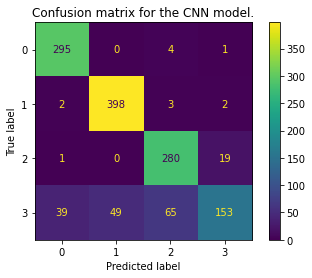

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions_CNN = np.argmax(model_CNN.predict(x_test_CNN),axis=1)

disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_CNN))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the CNN model.")
plt.show()

# Testing out Models

In [22]:
cnn = Sequential([
    Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(150,150,1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])
cnn.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 19600)             0         
                                                                 
 dense (Dense)               (None, 120)               2

In [23]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(x_train_CNN, y_train, epochs=20, batch_size=64, callbacks=[es])

cnn.save('cnn')

Epoch 1/20
90/90 [==============================] - 40s 421ms/step - loss: 0.6320 - accuracy: 0.7454
Epoch 2/20
90/90 [==============================] - 38s 425ms/step - loss: 0.3265 - accuracy: 0.8757
Epoch 3/20
90/90 [==============================] - 39s 428ms/step - loss: 0.2035 - accuracy: 0.9298
Epoch 4/20
90/90 [==============================] - 41s 461ms/step - loss: 0.1308 - accuracy: 0.9552
Epoch 5/20
90/90 [==============================] - 38s 425ms/step - loss: 0.0857 - accuracy: 0.9708
Epoch 6/20
90/90 [==============================] - 38s 425ms/step - loss: 0.0541 - accuracy: 0.9830
Epoch 7/20
90/90 [==============================] - 34s 381ms/step - loss: 0.0255 - accuracy: 0.9932
Epoch 8/20
90/90 [==============================] - 34s 378ms/step - loss: 0.0161 - accuracy: 0.9968
Epoch 9/20
90/90 [==============================] - 35s 386ms/step - loss: 0.0230 - accuracy: 0.9933
Epoch 10/20
90/90 [==============================] - 34s 377ms/step - loss: 0.0064 - accura

INFO:tensorflow:Assets written to: cnn/assets


41/41 [==============================] - 3s 58ms/step


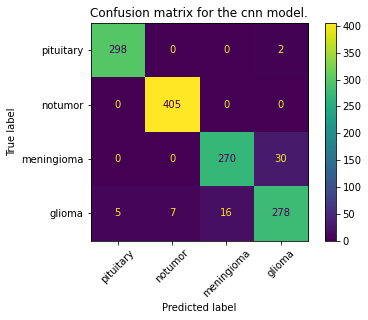

In [24]:
predictions_cnn = np.argmax(cnn.predict(x_test_CNN),axis=1)
test=np.argmax(y_test,axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_cnn))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the cnn model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [35]:
history_cnn = cnn.fit(x_train_CNN, y_train, batch_size = 64, epochs = 6)
cnn.save('cnn')

Epoch 1/6


/opt/anaconda3/lib/python3.9/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


90/90 [==============================] - 34s 364ms/step - loss: 0.3363 - accuracy: 0.6914
Epoch 2/6
90/90 [==============================] - 33s 372ms/step - loss: 0.1777 - accuracy: 0.8638
Epoch 3/6
90/90 [==============================] - 39s 434ms/step - loss: 0.1140 - accuracy: 0.9195
Epoch 4/6
90/90 [==============================] - 44s 484ms/step - loss: 0.0767 - accuracy: 0.9456
Epoch 5/6
90/90 [==============================] - 47s 518ms/step - loss: 0.0512 - accuracy: 0.9667
Epoch 6/6
90/90 [==============================] - 42s 463ms/step - loss: 0.0323 - accuracy: 0.9811
INFO:tensorflow:Assets written to: cnn1_6epochs/assets


INFO:tensorflow:Assets written to: cnn1_6epochs/assets


In [41]:
val_loss_cnn1, val_accuracy_cnn1 = cnn1.evaluate(x_test_CNN, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 3s 62ms/step - loss: 0.1103 - accuracy: 0.9260


41/41 [==============================] - 3s 60ms/step


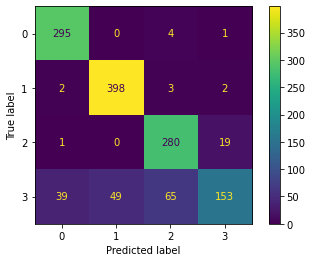

In [38]:
predictions_cnn1 = np.argmax(cnn1.predict(x_test_CNN),axis=1)

disp_cnn1 = ConfusionMatrixDisplay(confusion_matrix(test, predictions_CNN))
disp_cnn1.plot()
plt.show()

In [29]:
best_standard = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(150,150,1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

best_standard.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
best_standard.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [31]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=3,  restore_best_weights=True)

history_best = best_standard.fit(x_train_CNN, y_train, batch_size = 64, epochs = 20)
best_standard.save('CNN_Standard_Best')

Epoch 1/20
90/90 [==============================] - 92s 1s/step - loss: 0.3009 - accuracy: 0.7341
Epoch 2/20
90/90 [==============================] - 96s 1s/step - loss: 0.1848 - accuracy: 0.8556
Epoch 3/20
90/90 [==============================] - 101s 1s/step - loss: 0.1316 - accuracy: 0.9056
Epoch 4/20
90/90 [==============================] - 109s 1s/step - loss: 0.0840 - accuracy: 0.9396
Epoch 5/20
90/90 [==============================] - 102s 1s/step - loss: 0.0560 - accuracy: 0.9667
Epoch 6/20
90/90 [==============================] - 105s 1s/step - loss: 0.0409 - accuracy: 0.9722
Epoch 7/20
90/90 [==============================] - 100s 1s/step - loss: 0.0253 - accuracy: 0.9862
Epoch 8/20
90/90 [==============================] - 93s 1s/step - loss: 0.0157 - accuracy: 0.9911
Epoch 9/20
90/90 [==============================] - 92s 1s/step - loss: 0.0109 - accuracy: 0.9947
Epoch 10/20
90/90 [==============================] - 92s 1s/step - loss: 0.0056 - accuracy: 0.9979
Epoch 11/20
90

INFO:tensorflow:Assets written to: CNN_Standard_Best/assets


In [32]:
val_loss_cnn, val_accuracy_cnn = best_standard.evaluate(x_test_CNN, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 6s 134ms/step - loss: 0.0780 - accuracy: 0.9756


41/41 [==============================] - 6s 148ms/step


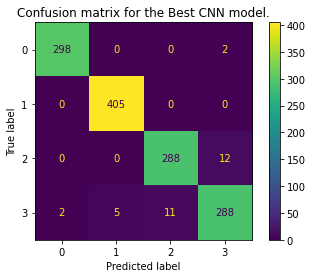

In [33]:
predictions_best_standard = np.argmax(best_standard.predict(x_test_CNN),axis=1)

disp_cnn2 = ConfusionMatrixDisplay(confusion_matrix(test, predictions_best_standard))
disp_cnn2.plot()
disp_cnn2.ax_.set_title("Confusion matrix for the Best CNN model.")
plt.show()

In [11]:
CNN_Standard_Best_saved_model = tf.keras.models.load_model("CNN_Standard_Best")

In [15]:
classes = ['pituitary', 'notumor','meningioma','glioma']

41/41 [==============================] - 7s 175ms/step


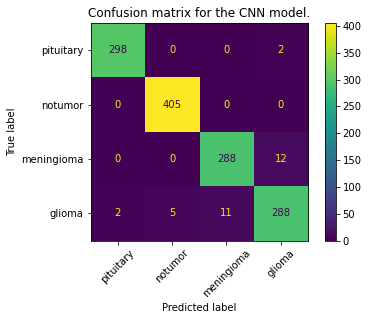

In [19]:
predictions_CNNStandard = np.argmax(CNN_Standard_Best_saved_model.predict(x_test_CNN),axis=1)
test=np.argmax(y_test,axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_CNNStandard))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the CNN model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [20]:
CNN3_saved_model = tf.keras.models.load_model("CNN3")

41/41 [==============================] - 6s 141ms/step


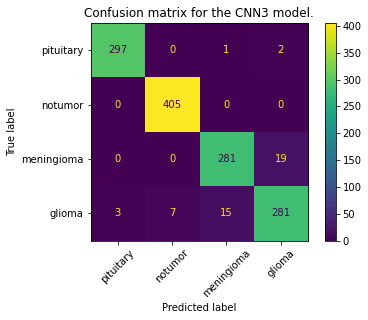

In [21]:
predictions_CNN3 = np.argmax(CNN3_saved_model.predict(x_test_CNN),axis=1)
disp_CNN = ConfusionMatrixDisplay(confusion_matrix(test, predictions_CNN3))
disp_CNN.plot()
disp_CNN.ax_.set_title("Confusion matrix for the CNN3 model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()

In [34]:
cnn3 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(150,150,1)),
    Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

cnn3.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      160       
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 73, 73, 32)        4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                 

In [35]:
es = EarlyStopping(monitor='accuracy', mode='max', patience=3,  restore_best_weights=True)
history_cnn3 = cnn3.fit(x_train_CNN, y_train, batch_size = 64, epochs = 20)
cnn3.save('CNN3')

Epoch 1/20
90/90 [==============================] - 115s 1s/step - loss: 0.2963 - accuracy: 0.7421
Epoch 2/20
90/90 [==============================] - 119s 1s/step - loss: 0.1682 - accuracy: 0.8690
Epoch 3/20
90/90 [==============================] - 113s 1s/step - loss: 0.1077 - accuracy: 0.9219
Epoch 4/20
90/90 [==============================] - 120s 1s/step - loss: 0.0656 - accuracy: 0.9561
Epoch 5/20
90/90 [==============================] - 123s 1s/step - loss: 0.0362 - accuracy: 0.9790
Epoch 6/20
90/90 [==============================] - 117s 1s/step - loss: 0.0143 - accuracy: 0.9933
Epoch 7/20
90/90 [==============================] - 116s 1s/step - loss: 0.0096 - accuracy: 0.9956
Epoch 8/20
90/90 [==============================] - 309s 3s/step - loss: 0.0052 - accuracy: 0.9986
Epoch 9/20
90/90 [==============================] - 6160s 69s/step - loss: 0.0099 - accuracy: 0.9970
Epoch 10/20
90/90 [==============================] - 7183s 81s/step - loss: 0.0074 - accuracy: 0.9975
Epoch

INFO:tensorflow:Assets written to: CNN3/assets


In [49]:
val_loss_cnn3, val_accuracy_cnn3 = cnn3.evaluate(x_test_CNN, y_test)
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 6s 146ms/step - loss: 0.0794 - accuracy: 0.9596


In [1]:
predictions_cnn3 = np.argmax(cnn3.predict(x_test_CNN),axis=1)

disp_cnn3 = ConfusionMatrixDisplay(confusion_matrix(test, predictions_cnn3))
disp_cnn3.plot()
disp_cnn3.ax_.set_title("Confusion matrix for the CNN model.")
plt.show()

NameError: name 'np' is not defined

In [2]:
k = {'Random Forest': [0.94], 'SVM':[0.88]}
data_f = pd.DataFrame(data = k)
data_f

,Random Forest,SVM
0,0.94,0.88


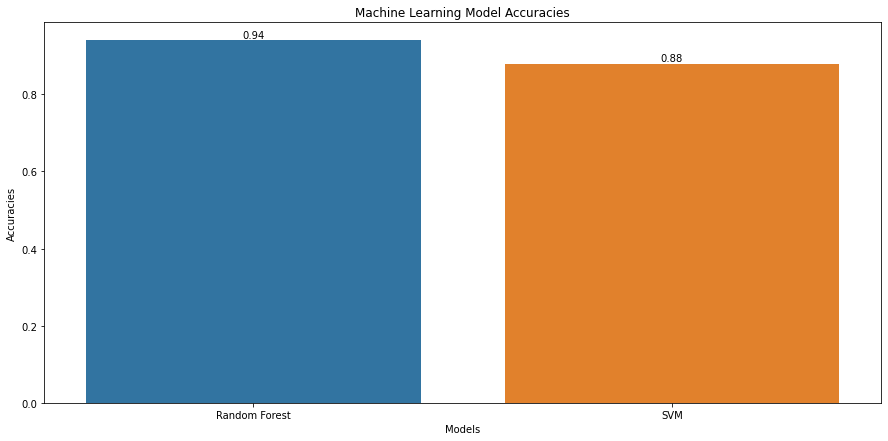

In [3]:
plt.figure(figsize = (15,7))
bars = sns.barplot(data = data_f)
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Machine Learning Model Accuracies')
for bar in bars.containers:
    bars.bar_label(bar,)
plt.show()

In [5]:
d = {'VGG16': [0.96], 'InceptionV3':[0.91], 'Xception': [0.95], 'ResNet50':[0.78],
    'CNN':[0.97], 'CNN with Dropout':[0.92]}
df = pd.DataFrame(data = d)
df

,VGG16,InceptionV3,Xception,ResNet50,CNN,CNN with Dropout
0,0.96,0.91,0.95,0.78,0.97,0.92


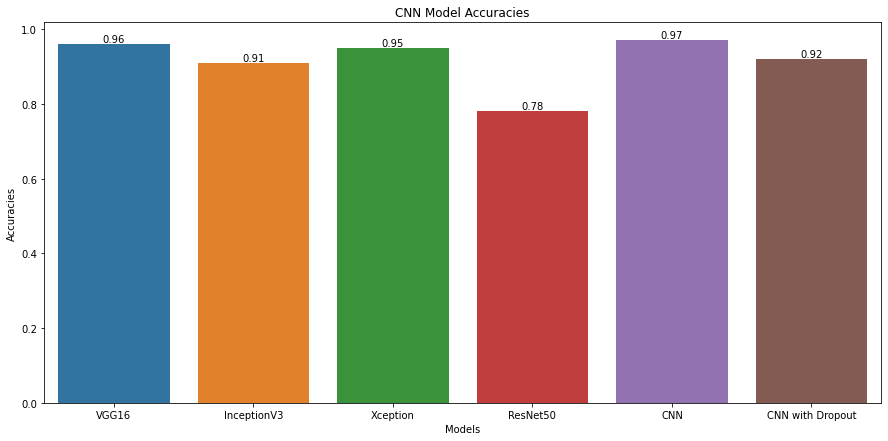

In [24]:
yval = [.96, .91, .95, .78, .97, .92]
plt.figure(figsize = (15,7))
bars = sns.barplot(data = df)
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('CNN Model Accuracies')
for bar in bars.containers:
    bars.bar_label(bar,)
plt.show()

In [69]:
accuracies = pd.Series(data=[.94, .91, .95, .78], 
                                index=['VGG16', 'InceptionV3', 'Xception', 'ResNet50'])
accuracies

VGG16          0.94
InceptionV3    0.91
Xception       0.95
ResNet50       0.78
dtype: float64

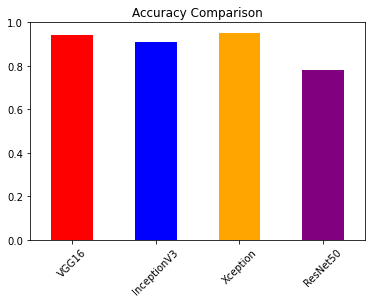

In [72]:
accuracies.plot(kind = 'bar', rot = 45, ylim = [0,1], color = ['red','blue','orange','purple'])
for bars in accuracies.plot:
    accuracies.plot.text()
plt.title('Accuracy Comparison')
plt.show()

# Hyper Paramater Tuning

In [19]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend


In [11]:
def model_builder(hp):
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(150,150,1)),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),
        Flatten(),
        Dense(units = hp_units, activation='relu'),
        Dense(4, activation='softmax')
])

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                  metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                #metrics=['accuracy'])

    return model

In [12]:
tuner = kt.Hyperband(model_builder,
                     objective='accuracy',
                     max_epochs=10,
                     factor=3,
                     )

Reloading Tuner from ./untitled_project/tuner0.json


In [24]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [14]:
tuner.search(x_train_CNN, y_train, epochs=50, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the last densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 18m 25s]
accuracy: 0.9852941036224365

Best accuracy So Far: 0.9991246461868286
Total elapsed time: 14h 19m 36s

The hyperparameter search is complete. The optimal number of units in the last densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.001.



In [15]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train_CNN, y_train, epochs=20)

val_acc_per_epoch = history.history['accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
179/179 [==============================] - 121s 668ms/step - loss: 0.2918 - accuracy: 0.7439
Epoch 2/20
179/179 [==============================] - 106s 594ms/step - loss: 0.1435 - accuracy: 0.8908
Epoch 3/20
179/179 [==============================] - 106s 592ms/step - loss: 0.0844 - accuracy: 0.9431
Epoch 4/20
179/179 [==============================] - 107s 595ms/step - loss: 0.0430 - accuracy: 0.9704
Epoch 5/20
179/179 [==============================] - 123s 688ms/step - loss: 0.0265 - accuracy: 0.9862
Epoch 6/20
179/179 [==============================] - 109s 607ms/step - loss: 0.0130 - accuracy: 0.9933
Epoch 7/20
179/179 [==============================] - 111s 621ms/step - loss: 0.0069 - accuracy: 0.9970
Epoch 8/20
179/179 [==============================] - 108s 602ms/step - loss: 0.0032 - accuracy: 0.9986
Epoch 9/20
179/179 [==============================] - 108s 602ms/step - loss: 0.0090 - accuracy: 0.9968
Epoch 10/20
179/179 [==============================] - 110s 613m

In [16]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train_CNN, y_train, epochs=best_epoch)

Epoch 1/19
179/179 [==============================] - 112s 620ms/step - loss: 0.2841 - accuracy: 0.7482
Epoch 2/19
179/179 [==============================] - 135s 756ms/step - loss: 0.1443 - accuracy: 0.8869
Epoch 3/19
179/179 [==============================] - 124s 690ms/step - loss: 0.0851 - accuracy: 0.9403
Epoch 4/19
179/179 [==============================] - 126s 704ms/step - loss: 0.0468 - accuracy: 0.9709
Epoch 5/19
179/179 [==============================] - 128s 713ms/step - loss: 0.0255 - accuracy: 0.9846
Epoch 6/19
179/179 [==============================] - 129s 720ms/step - loss: 0.0216 - accuracy: 0.9872
Epoch 7/19
179/179 [==============================] - 131s 730ms/step - loss: 0.0097 - accuracy: 0.9958
Epoch 8/19
179/179 [==============================] - 128s 712ms/step - loss: 0.0056 - accuracy: 0.9965
Epoch 9/19
179/179 [==============================] - 127s 712ms/step - loss: 0.0080 - accuracy: 0.9960
Epoch 10/19
179/179 [==============================] - 137s 766m

In [17]:
eval_result = hypermodel.evaluate(x_test_CNN, y_test)
print("[test loss, test accuracy]:", eval_result)

41/41 [==============================] - 7s 154ms/step - loss: 0.0808 - accuracy: 0.9748
[test loss, test accuracy]: [0.0808383896946907, 0.9748283624649048]


In [14]:
test=np.argmax(y_test,axis=1)

41/41 [==============================] - 6s 149ms/step


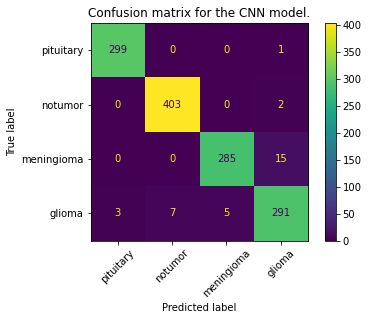

In [23]:
preds = np.argmax(hypermodel.predict(x_test_CNN),axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(test, preds))
disp.plot()
disp.ax_.set_title("Confusion matrix for the CNN model.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()



In [20]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

## Model with Dropout layer

In [26]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(150,150,1)),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Dropout(.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Dropout(.2),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2),strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(448, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

In [27]:
history = model.fit(x_train_CNN, y_train, epochs = 19,callbacks = [stop_early])

Epoch 1/19
179/179 [==============================] - 160s 885ms/step - loss: 0.3270 - accuracy: 0.7104
Epoch 2/19
179/179 [==============================] - 147s 821ms/step - loss: 0.1790 - accuracy: 0.8594
Epoch 3/19
179/179 [==============================] - 156s 870ms/step - loss: 0.1209 - accuracy: 0.9083
Epoch 4/19
179/179 [==============================] - 153s 855ms/step - loss: 0.0840 - accuracy: 0.9394
Epoch 5/19
179/179 [==============================] - 158s 883ms/step - loss: 0.0544 - accuracy: 0.9650
Epoch 6/19
179/179 [==============================] - 175s 980ms/step - loss: 0.0365 - accuracy: 0.9785
Epoch 7/19
179/179 [==============================] - 166s 930ms/step - loss: 0.0211 - accuracy: 0.9876
Epoch 8/19
179/179 [==============================] - 167s 934ms/step - loss: 0.0165 - accuracy: 0.9918
Epoch 9/19
179/179 [==============================] - 172s 960ms/step - loss: 0.0087 - accuracy: 0.9949
Epoch 10/19
179/179 [==============================] - 189s 1s/s

41/41 [==============================] - 7s 162ms/step


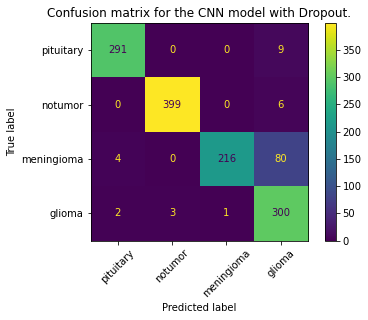

In [28]:
preds = np.argmax(model.predict(x_test_CNN),axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(test, preds))
disp.plot()
disp.ax_.set_title("Confusion matrix for the CNN model with Dropout.")
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
plt.show()


In [29]:
print(classification_report(test, preds , target_names= classes ))

              precision    recall  f1-score   support

   pituitary       0.98      0.97      0.97       300
     notumor       0.99      0.99      0.99       405
  meningioma       1.00      0.72      0.84       300
      glioma       0.76      0.98      0.86       306

    accuracy                           0.92      1311
   macro avg       0.93      0.91      0.91      1311
weighted avg       0.94      0.92      0.92      1311

